In [2]:
#pip install --upgrade ipython ipython_genutils
#!pip install pandas-profiling
#!pip install pydantic-settings


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy.linalg import eig
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pydantic_settings import BaseSettings

Abalone is common name for any group of small to very large sea snails, commonly found along the coasts across the world, and used as delicacy in cuisines and it's leftover shell is fashioned into jewelry due to it's iridescent luster. Due to it's demand and economic value it's often harvested in farms, and as such the need to predict the age of abalone from physical measurements. Traditional approach to determine it's age is by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.

In [4]:
os.chdir("/home/pavle/Desktop/PRML/projekat")
data = pd.read_csv('abalone.csv')
data.head()
# Sex - F, M and I (infant)
# Length - the longest measurement
# Diameter - perpendicular to length
# Height - with meat in shell (debljina kad se polozi skoljka)
# Whole weight - shell with meat
# Shucked weight - weight of meat
# Viscera weight - weight of meat after bleeding (tezina utrobe, iscedjena) 
# Shell weight - after being dried
# Rings - +1.5 it gives age in year, ; we will stick to this ring counting instead of switching to ages

# Measure units are 200mm and 200gr, not mm and gr as its written on the website
# Except first 5 features (including sex) all other can be measured only after processing

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print(data.dtypes)
# The data is formated properly
data.describe()
# No missing data

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
# We can notice that there do exist some instances with height equal to 0
# We can assume that those are errors and remove them
data = data[data['Height'] != 0]

In [7]:
data['Sex']=data['Sex'].astype('category')
data['Sex'].value_counts()

Sex
M    1528
I    1340
F    1307
Name: count, dtype: int64

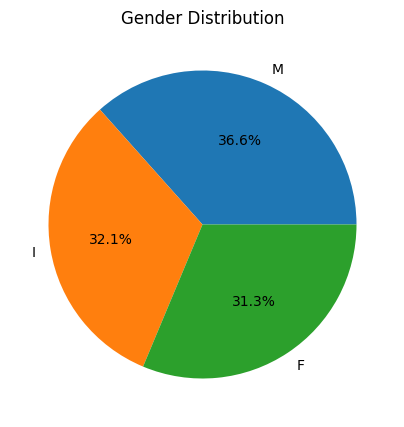

In [8]:
# Let's count occurrences of each sex category:
sex_counts = data['Sex'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Number of instances of each group are similar

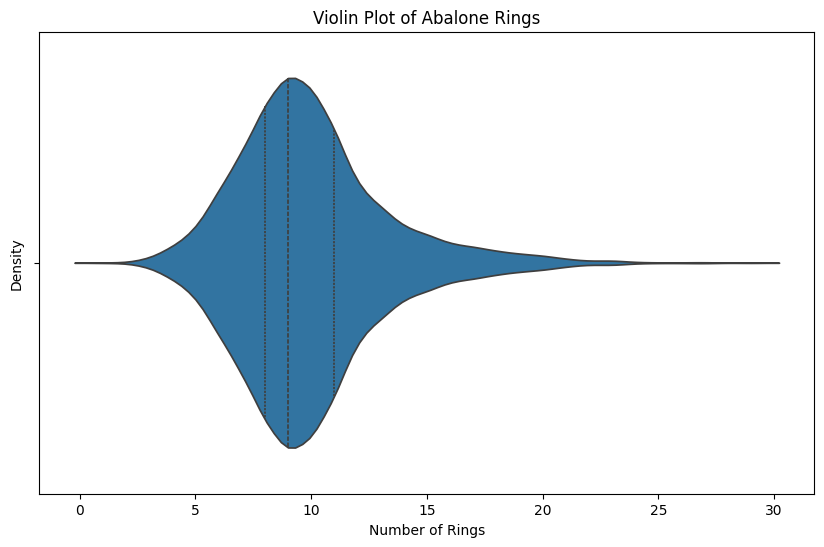

In [9]:
# Violin plot to see how the rings are distributed:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Rings', data=data, inner='quartile')
plt.title('Violin Plot of Abalone Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Density')

plt.show()

# We can separate the data with quantiles
# Perhaps we can combine 2nd and 3rd groups which would result in following separation: young, adult, old

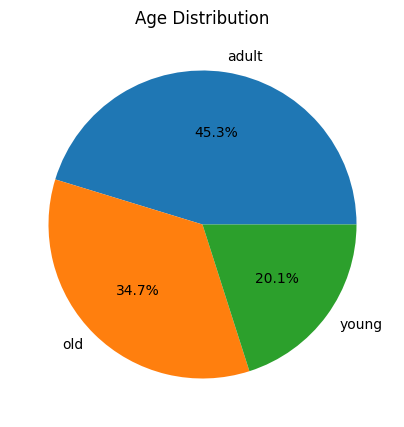

In [10]:
# Now we are classifying each abalone to an age group: (3 groups)
def classify_age_group(rings):
    if rings < 8:
        return 'young'
    elif 8 <= rings < 11:
        return 'adult'
    elif rings >= 11:
        return 'old'
    else:
        return 'Error'

data['Age group'] = data['Rings'].apply(classify_age_group)

category_order = ['young', 'adult', 'old']
pd.Categorical(data['Age group'], categories=category_order, ordered=True)

age_counts = data['Age group'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()


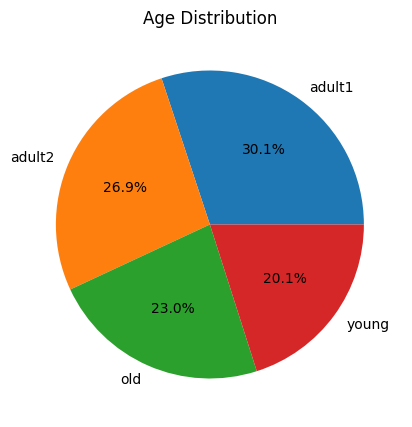

In [11]:
# We are classifying each abalone to an age group (4 groups, by quantiles)
def classify_age_group_q(rings):
    if rings < 8:
        return 'young'
    elif 8 <= rings <= 9:
        return 'adult1'
    elif 10 <= rings <= 11:
        return 'adult2'
    elif rings >= 12:
        return 'old'
    else: return 'Error'

data['Age group q'] = data['Rings'].apply(classify_age_group_q)

category_order_q = ['young', 'adult1', 'adult2', 'old']
data['Age group q'] = pd.Categorical(data['Age group q'], categories=category_order_q, ordered=True)

age_q_counts = data['Age group q'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(age_q_counts, labels=age_q_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='Age group q', ylabel='Count'>

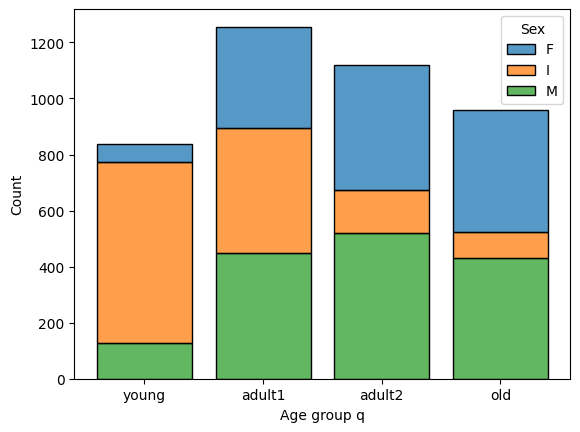

In [12]:
# Let's look at the distribution of sex by each age group
sns.histplot(data=data, x='Age group q', hue='Sex', multiple='stack', shrink=.8)
#sns.histplot(data=data, x='Age group', hue='Sex', multiple='stack', shrink=.8)

# We can see that infants exist in all age categories but mostly in young one
# According to (United Nations, 1990), lack of adequate food supply or cold habitats can prevent abalones from maturing.
# In all age categories number of males and females are similar, except in young ones where we see more females

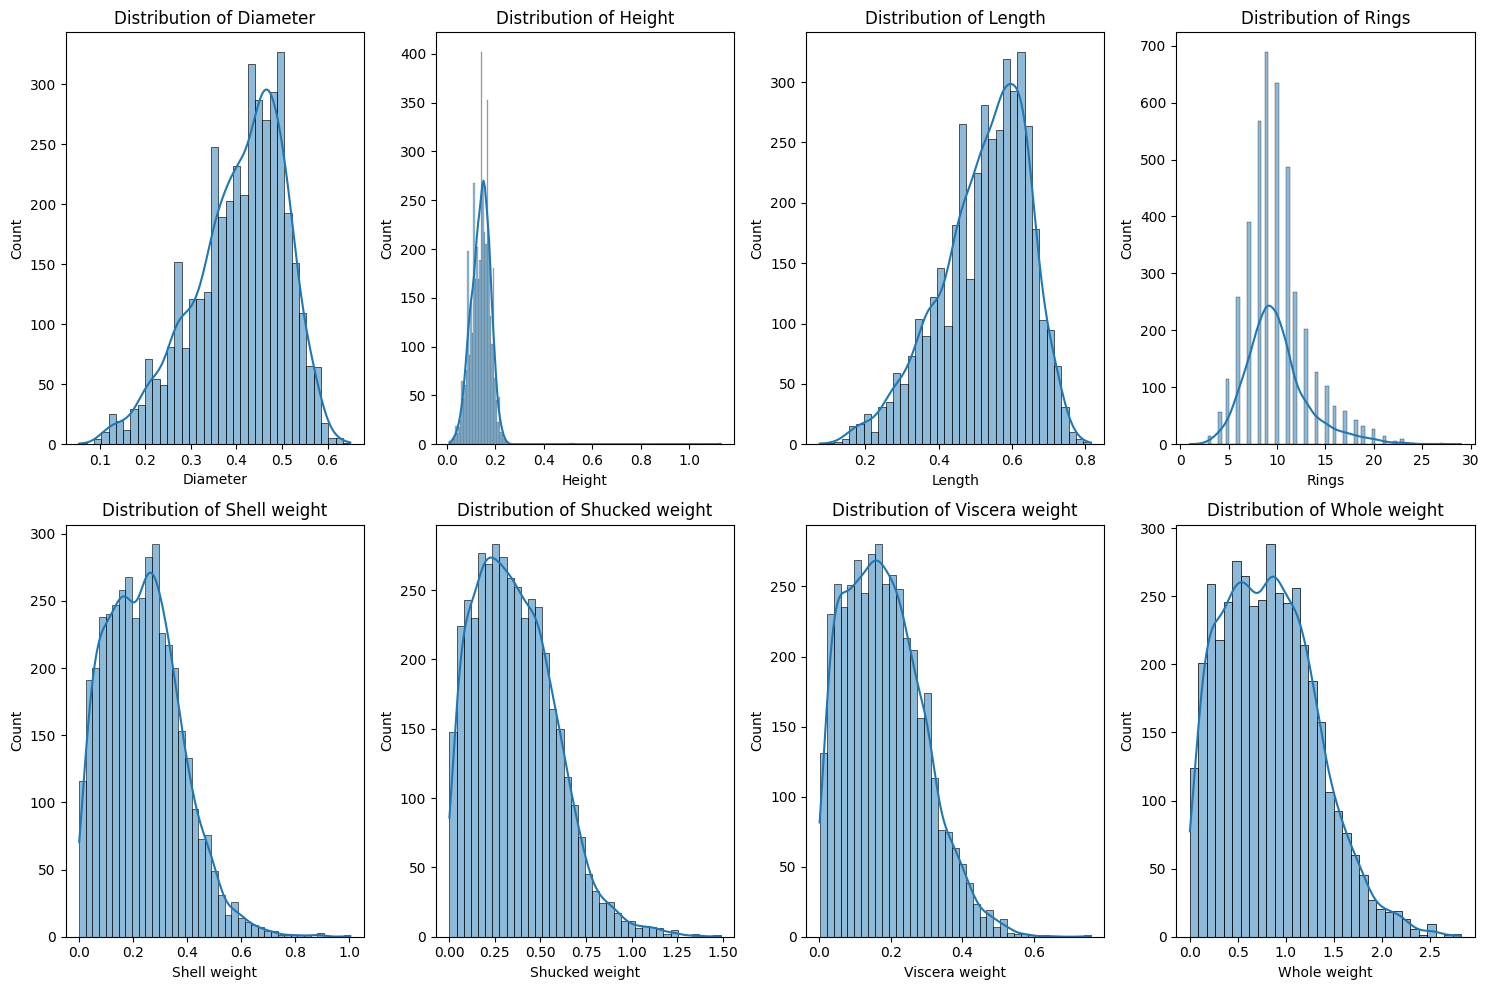

In [13]:
columns_to_plot = data.columns.difference(['Sex', 'Age group', 'Age group q'])

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any empty subplots
#for j in range(i + 1, len(axes)):
    #fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Height and Rings have a distribution thats similar to normal distribution, while others are skewed

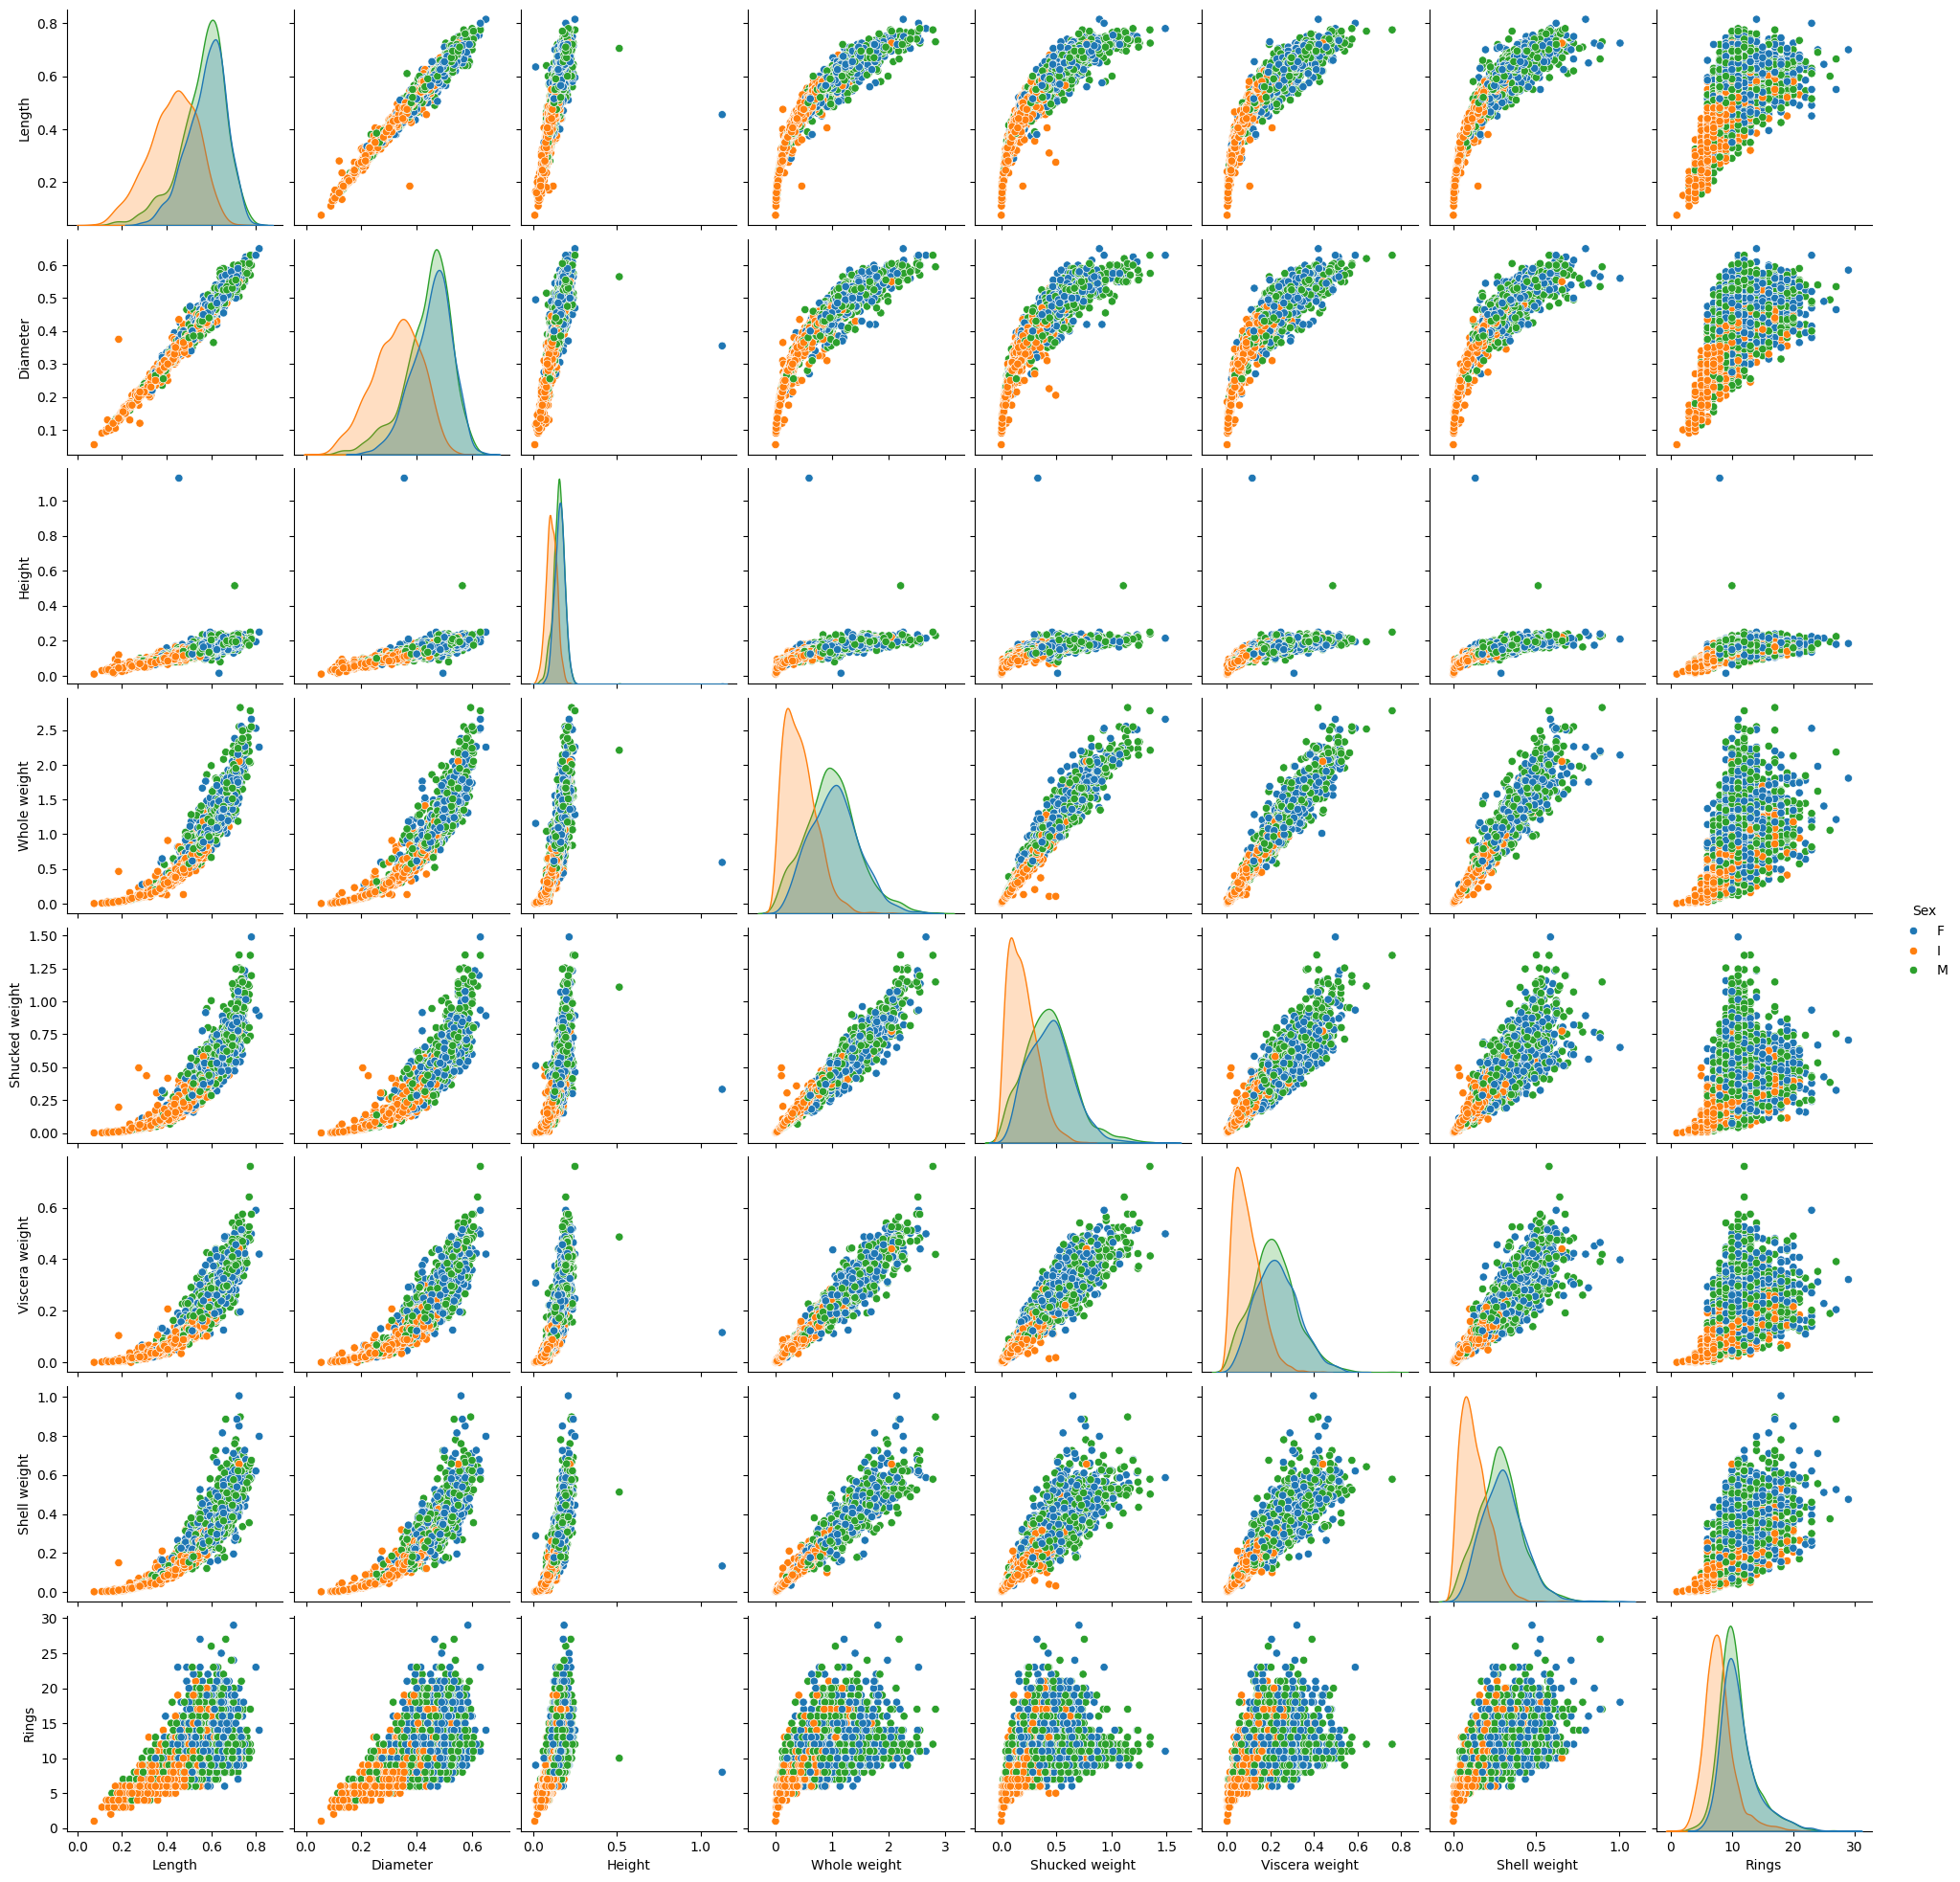

In [14]:
sns.pairplot(data, hue="Sex")
# Infants usually have different distribution, but there is not distinct difference between Males and Females
# Correlations can be described linearly, logarithmically or exponentially; only the rings are very scattered

Odavde vidimo da vecina promenljivih ima visoke stepene korelacije medjusobno. Sad cemo to da ispitamo posebno, heatmap-om, i da odbacimo prilikom dalje analize neke od njih.

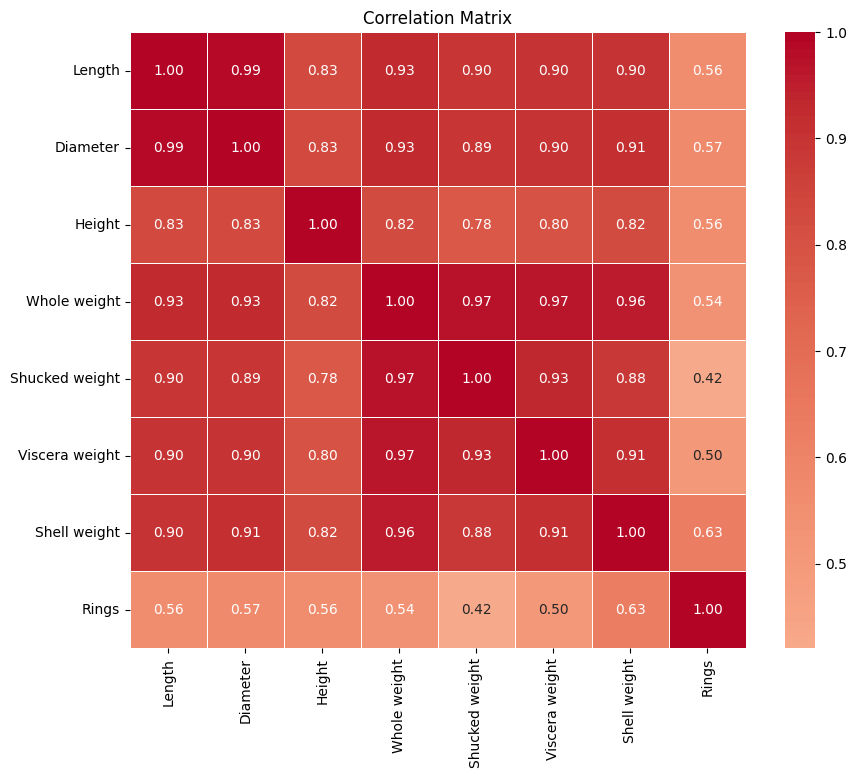

In [15]:
corr = data.drop(columns=['Sex', 'Age group', 'Age group q'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

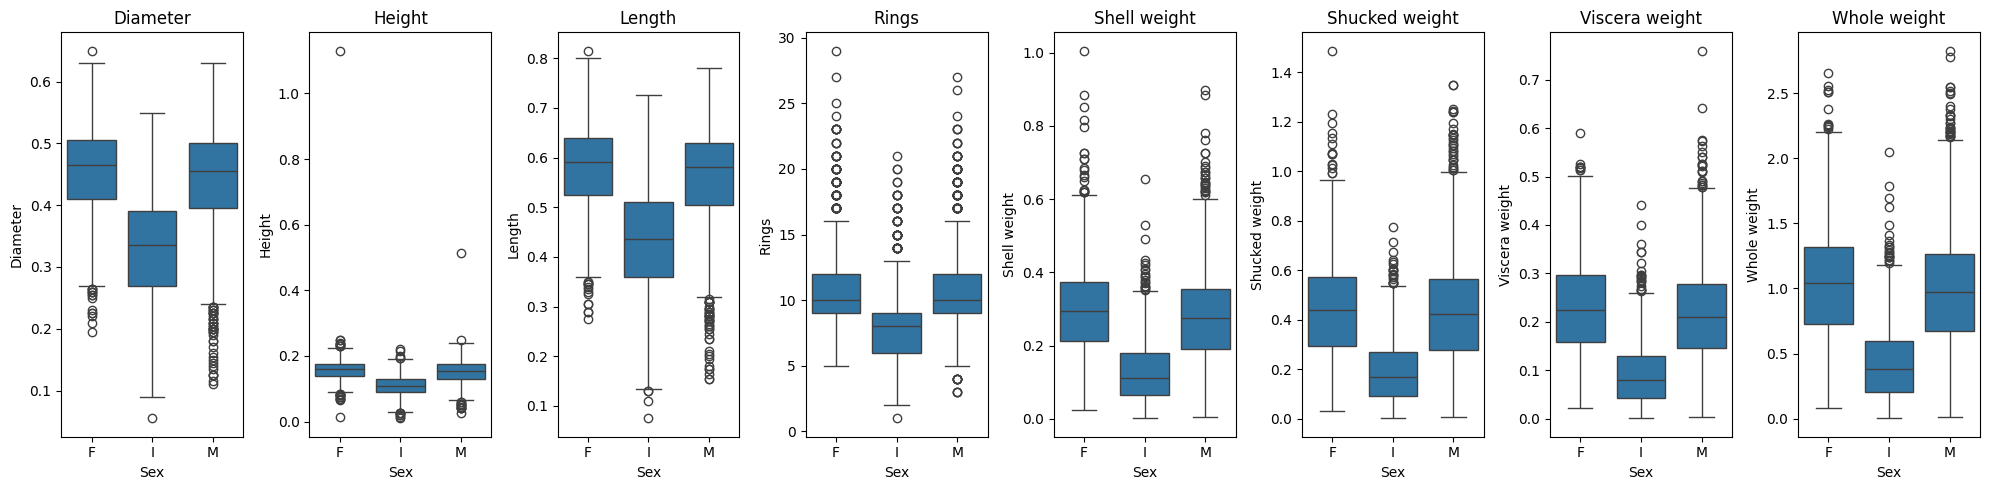

In [16]:
columns_to_plot = data.columns.difference(['Sex', 'Age group', 'Age group q'])

fig, axes = plt.subplots(1, 8, figsize=(20, 5))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Sex', y=column, data=data, ax=axes[i])  
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel(column)


plt.tight_layout()
plt.show()

# We can observe that only Infants significantly differ when it comes to mean, opposed to Females and Males
# Hence, it might be a good idea to create 2 models, one for Infants and the other one for Females and Males, that way we could potentially achieve greater accuracy

Splitting data1 into test-train subsets and performing + evaluating (built-in) linear regression model


In [17]:
X = data.drop(columns = ['Rings', 'Age group', 'Age group q'], axis=1)
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scree plot to see which dependent variables cover 80% of the explained variance ratio:

# Function used for calculating the covariance matrix which first centers the data
def covariance_matrix(X):
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector
    n = len(X)

    covariance_matrix = np.zeros((len(mean_vector), len(mean_vector)))
    
    # We are calculating only the upper triangle of the matrix since its symmetric, and we are just copying it to lower triangle
    for i in range(len(mean_vector)):
        for j in range(i, len(mean_vector)):
            covariance_matrix = np.dot(X_centered.T, X_centered) / (n - 1)
            covariance_matrix[j, i] = covariance_matrix[i, j] 
    
    return covariance_matrix

Eigenvalues: [3.38133491e-01 3.96292679e-03 2.90335517e-03 1.04926360e-03
 1.48139377e-04 4.87185008e-04 4.17374675e-04]
Eigenvectors: [[-0.19312272  0.35250807 -0.65417171 -0.04106612 -0.62008802  0.15587666
   0.00281789]
 [-0.15952499  0.32080507 -0.50416598  0.0174065   0.7815178   0.07503609
  -0.02736914]
 [-0.0591935   0.13546486 -0.08422648  0.01088678 -0.04753134 -0.91271811
  -0.36826513]
 [-0.84259778  0.01830169  0.31292183 -0.12279899 -0.0055221   0.18046927
  -0.3795981 ]
 [-0.37195971 -0.70308352 -0.34192155  0.3482331   0.01192908 -0.17229671
   0.31514194]
 [-0.18224255  0.0131247   0.02595021 -0.76934455  0.03302883 -0.22809965
   0.56650736]
 [-0.22850414  0.50954666  0.30867152  0.5192833  -0.03460979 -0.15077448
   0.54706858]]
Eigenvalue: 0.3381334908367672, explained variance ratio: 0.9742, which is circa 97.42% of the total variation around the PCs.
Eigenvalue: 0.00396292678503303, explained variance ratio: 0.0114, which is circa 1.14% of the total variation aro

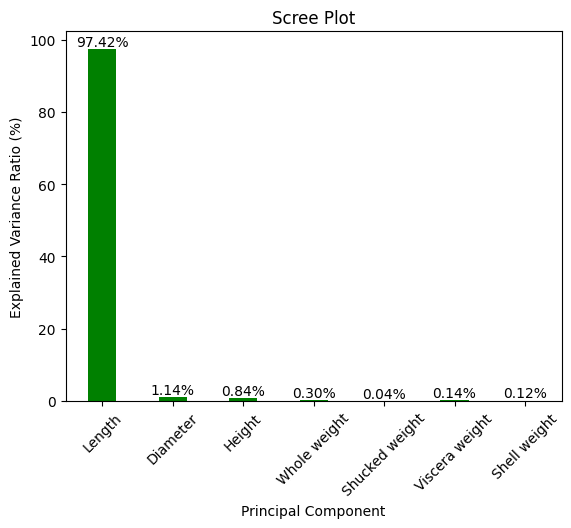

In [19]:
# We are still using the whole set because we still want to see the data dispersion, we are still not modeling

X_excluded = X.drop('Sex', axis=1)
X_excluded_np = X_excluded.to_numpy()

# Calculate covariance matrix
cov_matrix_sample = covariance_matrix(X_excluded_np)
e_values, e_vectors = eig(cov_matrix_sample)

# Print eigenvalues and eigenvectors
print('Eigenvalues:', e_values)
print('Eigenvectors:', e_vectors)

# Eigenvalues and relative shares of principal components
for e_val in e_values:
    explained_variance_ratio = e_val / np.sum(e_values)
    print(f"Eigenvalue: {e_val}, explained variance ratio: {explained_variance_ratio:.4f}, which is circa {explained_variance_ratio * 100:.2f}% of the total variation around the PCs.")

# Scree plot: Explained Variance Ratio for Each Principal Component
explained_variance_ratios = e_values / np.sum(e_values)

column_names = X_excluded.columns
plt.bar(column_names, explained_variance_ratios * 100, color='green', width=0.4)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Scree Plot')
plt.xticks(fontsize=10, rotation=45)
for i, ratio in enumerate(explained_variance_ratios):
    plt.text(i, ratio * 100, f'{ratio * 100:.2f}%', ha='center', va='bottom')

plt.show()

# The results are somewhat expected considering that some of the features have apporximately linear correlation

Finally, we perform the linear regression, after the conclusion that all physical features have high correlation coefficient so we can shrunk them all into one.

In [20]:
reg = LinearRegression()
reg.fit(X_train[['Length']], y_train)

prediction = reg.predict(X_test[['Length']])

print('R^2 score:', r2_score(y_test, prediction))
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))

R^2 score: 0.3056156174629052
MAE: 2.0233756363125
MSE: 7.9233727264617055


In [21]:
# Evaluating the performance of linear regression model:
# R^2 evaluation metric represents the proportion of the variance in the target variable (Rings) that is predictable from the independent variables in a regression model.

reg = LinearRegression()
reg.fit(X_train.drop('Sex', axis=1), y_train)

prediction = reg.predict(X_test.drop('Sex', axis=1))

print('R^2 score:', r2_score(y_test, prediction))
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))

# It is not great but it is better compared to univariate linear regression, but that is to be expected considering linearity between independent variables used

R^2 score: 0.557496006547985
MAE: 1.6282516608957822
MSE: 5.049255371005962
